## GENDER VIOLENCE DATA CLEANING

### Pseudocodes
- import the necessary libraries
- import dataset
- check through for abnormalities and handle them all
- check for correlation
- print out your cleaned dataset
- train-test split
- build a machine learning model
- evaluate the performance

In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sb

In [3]:
#reading the dataset into the notebook
df = pd.read_csv(r'C:\Users\pc\Desktop\pythonclass\Aptech\DataAnalytics\DataSets\gender_violence.csv')

In [4]:
df.head()

,id,gender,age,education,income,employment,marital_status,number_of_children,household_size,location,violence_type,violence_frequency,violence_severity,Duration_of_Violence,Impact_score
0,A1234567,female,20.0,high_school,low,unemployed,single,0.0,1,urban,physical,once_a_month,severe,2.5,8.7
1,B9876543,male,30.0,college,high,employed,married,1.0,2,suburban,verbal,once_a_year,moderate,1.8,5.2
2,C2345678,female,40.0,graduate_school,high,self-employed,NaN,2.0,3,rural,sexual,once_a_week,mild,3.2,3.9
3,D8765432,female,NaN,NaN,high,unemployed,single,0.0,1,urban,physical,once_a_week,severe,1.5,7.3
4,E3456789,male,31.0,college,NaN,employed,married,NaN,2,suburban,verbal,once_a_month,moderate,2.9,6.1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    242 non-null    object 
 1   gender                242 non-null    object 
 2   age                   198 non-null    float64
 3   education             198 non-null    object 
 4   income                232 non-null    object 
 5   employment            234 non-null    object 
 6   marital_status        232 non-null    object 
 7   number_of_children    235 non-null    float64
 8   household_size        237 non-null    object 
 9   location              241 non-null    object 
 10  violence_type         242 non-null    object 
 11  violence_frequency    242 non-null    object 
 12  violence_severity     242 non-null    object 
 13  Duration_of_Violence  242 non-null    float64
 14  Impact_score          241 non-null    float64
dtypes: float64(4), object(1

In [6]:
df.describe()

,age,number_of_children,Duration_of_Violence,Impact_score
count,198.000000,235.000000,242.000000,241.000000
mean,32.116162,0.957447,2.308264,6.700415
std,4.603204,0.825798,0.519350,6.760119
min,20.000000,0.000000,-2.200000,3.200000
25%,30.000000,0.000000,2.000000,4.500000
50%,32.000000,1.000000,2.300000,5.900000
75%,36.000000,2.000000,2.675000,7.800000
max,41.000000,3.000000,3.700000,94.000000


## Handling Missing Values

In [8]:
#MISSING VALUES FOR NUMERIC DATA
df.age = df.age.fillna(df.age.mean())
df.number_of_children = df.number_of_children.fillna(df.number_of_children.mean())
df.Impact_score = df.Impact_score.fillna(df.Impact_score.mean())

In [9]:
#MISSING VALUES FOR CATEGORICAL DATA
df.education = df.education.fillna('None')
df.income = df.income.fillna(df.income.mode()[0])
df.employment = df.employment.fillna('unemployed')
df.marital_status = df.marital_status.fillna(df.marital_status.mode()[0])
df.household_size = df.household_size.fillna(df.household_size.mode()[0])
df.location = df.location.fillna(df.location.mode()[0])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    242 non-null    object 
 1   gender                242 non-null    object 
 2   age                   242 non-null    float64
 3   education             242 non-null    object 
 4   income                242 non-null    object 
 5   employment            242 non-null    object 
 6   marital_status        242 non-null    object 
 7   number_of_children    242 non-null    float64
 8   household_size        242 non-null    object 
 9   location              242 non-null    object 
 10  violence_type         242 non-null    object 
 11  violence_frequency    242 non-null    object 
 12  violence_severity     242 non-null    object 
 13  Duration_of_Violence  242 non-null    float64
 14  Impact_score          242 non-null    float64
dtypes: float64(4), object(1

In [11]:
df.education.value_counts().index

Index(['high_school', 'college', 'graduate_school', 'None'], dtype='object', name='education')

In [12]:
df.income.value_counts()

income
low     133
high    109
Name: count, dtype: int64

In [13]:
df.employment.value_counts()

employment
unemployed       85
employed         83
self-employed    74
Name: count, dtype: int64

In [14]:
df.marital_status.value_counts()

marital_status
single      92
married     79
divorced    71
Name: count, dtype: int64

## Handling Outliers

Upper Percentile


In [17]:
df.Impact_score.describe()

count    242.000000
mean       6.700415
std        6.746079
min        3.200000
25%        4.500000
50%        5.900000
75%        7.800000
max       94.000000
Name: Impact_score, dtype: float64

In [24]:
up = np.percentile(df.Impact_score,[99])[0]
print(up)

9.759


In [26]:
df[df.Impact_score > up]

,id,gender,age,education,income,employment,marital_status,number_of_children,household_size,location,violence_type,violence_frequency,violence_severity,Duration_of_Violence,Impact_score
143,N9632587,female,34.0,college,low,unemployed,divorced,2.0,3,suburban,physical,once_a_year,severe,2.2,9.8
197,P2583694,female,38.0,graduate_school,low,unemployed,divorced,2.0,3,suburban,verbal,once_a_year,moderate,2.4,55.4
203,V7418529,female,34.0,graduate_school,low,unemployed,divorced,2.0,3,suburban,verbal,once_a_year,mild,-2.2,94.0


In [30]:
df.loc[df.Impact_score > 3*up, "Impact_score"] = 3*up

In [32]:
df.Impact_score.describe()

count    242.000000
mean       6.325018
std        2.851980
min        3.200000
25%        4.500000
50%        5.900000
75%        7.800000
max       29.277000
Name: Impact_score, dtype: float64

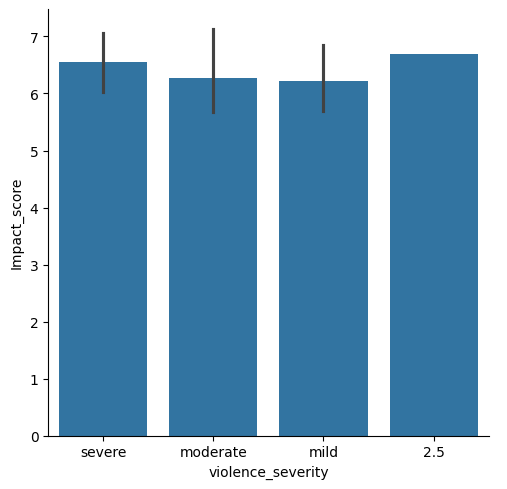

In [55]:
#creating a bar plot of severity against impact score just to see
sb.catplot(data=df, x="violence_severity", y="Impact_score", kind="bar")

Lower Percentile

In [35]:
df.Duration_of_Violence.describe()

count    242.000000
mean       2.308264
std        0.519350
min       -2.200000
25%        2.000000
50%        2.300000
75%        2.675000
max        3.700000
Name: Duration_of_Violence, dtype: float64

In [45]:
lp = np.percentile(df.Duration_of_Violence,[99])[0]
print(lv)

3.0590000000000006


In [41]:
df[df.Duration_of_Violence < lp]

,id,gender,age,education,income,employment,marital_status,number_of_children,household_size,location,violence_type,violence_frequency,violence_severity,Duration_of_Violence,Impact_score
0,A1234567,female,20.000000,high_school,low,unemployed,single,0.000000,1,urban,physical,once_a_month,severe,2.5,8.7
1,B9876543,male,30.000000,college,high,employed,married,1.000000,2,suburban,verbal,once_a_year,moderate,1.8,5.2
3,D8765432,female,32.116162,None,high,unemployed,single,0.000000,1,urban,physical,once_a_week,severe,1.5,7.3
4,E3456789,male,31.000000,college,low,employed,married,0.957447,2,suburban,verbal,once_a_month,moderate,2.9,6.1
5,F7654321,female,41.000000,graduate_school,high,self-employed,divorced,2.000000,1,rural,sexual,once_a_year,mild,2.1,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,D7418529,female,38.000000,high_school,low,employed,single,0.000000,1,rural,verbal,once_a_week,severe,2.4,4.8
238,E9632587,male,34.000000,college,high,unemployed,divorced,2.000000,3,suburban,verbal,once_a_month,mild,2.7,7.1
239,F8529631,female,30.000000,high_school,low,employed,single,0.000000,1,rural,verbal,once_a_year,moderate,2.0,9.6
240,G3698521,male,36.000000,graduate_school,low,self-employed,married,1.000000,2,urban,verbal,once_a_week,mild,2.3,5.2


In [47]:
df.loc[df.Duration_of_Violence < 0.5*lp, "Duration_of_Violence"] = 0.5*lp

In [49]:
df.Duration_of_Violence.describe()

count    242.000000
mean       2.331140
std        0.407322
min        1.529500
25%        2.000000
50%        2.300000
75%        2.675000
max        3.700000
Name: Duration_of_Violence, dtype: float64

In [51]:
df.describe()

,age,number_of_children,Duration_of_Violence,Impact_score
count,242.000000,242.000000,242.000000,242.000000
mean,32.116162,0.957447,2.331140,6.325018
std,4.161834,0.813717,0.407322,2.851980
min,20.000000,0.000000,1.529500,3.200000
25%,30.000000,0.000000,2.000000,4.500000
50%,32.116162,1.000000,2.300000,5.900000
75%,35.000000,2.000000,2.675000,7.800000
max,41.000000,3.000000,3.700000,29.277000


## Dropping non-useful columns

In [109]:
'''#inplace modifies the original dataframe
df.drop('id',axis=1,inplace=True)'''

"#inplace modifies the original dataframe\ndf.drop('id',axis=1,inplace=True)"

## Assessing and Addressing Skewness

using the pandas function df.skew to check for columns, and perhaps rows, that are skewed

df.skew() checks for skewness in numeric columns so i have to filter the numeric from the categorical using df.select_dtypes() function

In [71]:
numeric_columns = df.select_dtypes(include=['float64','int64'])
print(numeric_columns)

# Skewness over numeric columns
skewness_over_columns = numeric_columns.skew(axis=0, skipna=True)
# Skewness over rows
skewness_over_rows = numeric_columns.skew(axis=1, skipna=True)  
print(skewness_over_columns)
print(skewness_over_rows)

           age  number_of_children  Duration_of_Violence  Impact_score
0    20.000000            0.000000                2.5000           8.7
1    30.000000            1.000000                1.8000           5.2
2    40.000000            2.000000                3.2000           3.9
3    32.116162            0.000000                1.5295           7.3
4    31.000000            0.957447                2.9000           6.1
..         ...                 ...                   ...           ...
237  38.000000            0.000000                2.4000           4.8
238  34.000000            2.000000                2.7000           7.1
239  30.000000            0.000000                2.0000           9.6
240  36.000000            1.000000                2.3000           5.2
241  32.000000            2.000000                2.6000           3.5

[242 rows x 4 columns]
age                    -0.550806
number_of_children      0.127271
Duration_of_Violence   -0.072754
Impact_score            4

### Check Skewness Values:


Use the Pandas dataframe.skew() method to calculate skewness for each column

* If the skewness value is close to 0, the distribution is approximately symmetric.
* If the skewness is positive (greater than 0), the distribution is right-skewed (tail on the right).
* If the skewness is negative (less than 0), the distribution is left-skewed (tail on the left).eristics.


### Interpret Skewness:
* Generally, skewness values between -0.5 and 0.5 are considered acceptable for most analyses.
* If skewness is beyond this range, consider applying transformations to make the data more symmetric.

### Apply Transformations:
Common transformations include log transformation, Box-Cox transformation, or exponential transformation.
Choose the appropriate transformation based on the data characteristics.

In [86]:
#Applying transformation on Impact_score with skew value of 4.321675 (positive skewness)
#using log transformation because the data has a positive skew
#using natural logarithm directly on the column values because the column is strictly positive (>0)
df.Impact_score = np.log(df.Impact_score)

In [94]:
#checking skewness in Impact)score post-treatment
skew_check = df.Impact_score.skew()
print(f'New skewness value of Impact_score is {skew_check}')

New skewness value of Impact_score is -0.1345348677621874


In [90]:
df.Impact_score.describe()

count    242.000000
mean       0.553265
std        0.203470
min        0.151133
25%        0.408180
50%        0.573774
75%        0.719849
max        1.216929
Name: Impact_score, dtype: float64

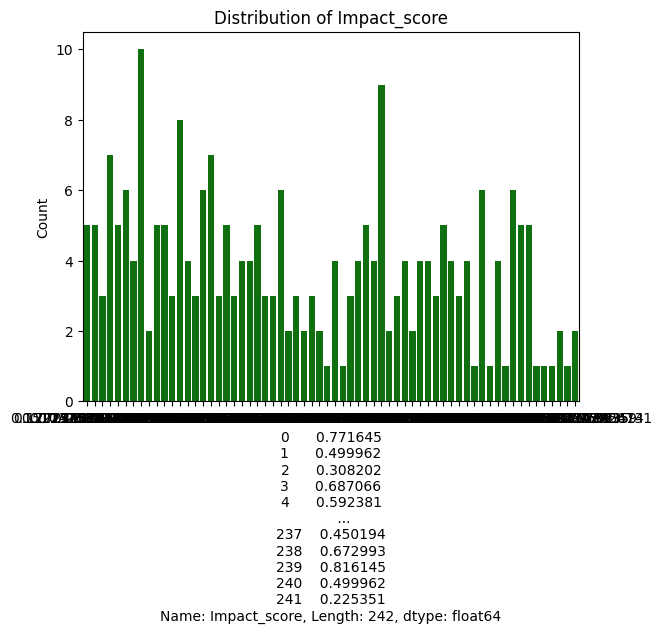

In [150]:
#plotting a histogram to check for treated skewness
import matplotlib.pyplot as plt
sb.countplot(data=df,x=df.Impact_score,color='green')
plt.xlabel(df.Impact_score)
plt.ylabel('Count')
plt.title('Distribution of Impact_score')
plt.show()

## Handling Categorical Variables
I'll be using **LabelEncoder** because i do not want to specify an order for the data in the variables as it doesn't come with a useful inherent order

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                242 non-null    object 
 1   age                   242 non-null    float64
 2   education             242 non-null    object 
 3   income                242 non-null    object 
 4   employment            242 non-null    object 
 5   marital_status        242 non-null    object 
 6   number_of_children    242 non-null    float64
 7   household_size        242 non-null    object 
 8   location              242 non-null    object 
 9   violence_type         242 non-null    object 
 10  violence_frequency    242 non-null    object 
 11  violence_severity     242 non-null    object 
 12  Duration_of_Violence  242 non-null    float64
 13  Impact_score          242 non-null    float64
dtypes: float64(4), object(10)
memory usage: 26.6+ KB


In [115]:
from sklearn.preprocessing import LabelEncoder
#creating new columns of the variables to add to the datasets after encoding
encoder = LabelEncoder()

df['gender_'] = encoder.fit_transform(df.gender)
df['education_'] = encoder.fit_transform(df.education)
df['income_'] = encoder.fit_transform(df.income)
df['employment_'] = encoder.fit_transform(df.employment)
df['marital_status_'] = encoder.fit_transform(df.marital_status)
df['household_size_'] = encoder.fit_transform(df.household_size)
df['location_'] = encoder.fit_transform(df.location)
df['violence_type_'] = encoder.fit_transform(df.violence_type)
df['violence_frequency_'] = encoder.fit_transform(df.violence_frequency)
df['violence_severity_'] = encoder.fit_transform(df.violence_severity)

In [117]:
df.head()

,gender,age,education,income,employment,marital_status,number_of_children,household_size,location,violence_type,...,gender_,education_,income_,employment_,marital_status_,household_size_,location_,violence_type_,violence_frequency_,violence_severity_
0,female,20.000000,high_school,low,unemployed,single,0.000000,1,urban,physical,...,0,3,1,2,2,0,2,1,1,3
1,male,30.000000,college,high,employed,married,1.000000,2,suburban,verbal,...,1,1,0,0,1,1,1,3,3,2
2,female,40.000000,graduate_school,high,self-employed,single,2.000000,3,rural,sexual,...,0,2,0,1,2,2,0,2,2,1
3,female,32.116162,None,high,unemployed,single,0.000000,1,urban,physical,...,0,0,0,2,2,0,2,1,2,3
4,male,31.000000,college,low,employed,married,0.957447,2,suburban,verbal,...,1,1,1,0,1,1,1,3,1,2


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                242 non-null    object 
 1   age                   242 non-null    float64
 2   education             242 non-null    object 
 3   income                242 non-null    object 
 4   employment            242 non-null    object 
 5   marital_status        242 non-null    object 
 6   number_of_children    242 non-null    float64
 7   household_size        242 non-null    object 
 8   location              242 non-null    object 
 9   violence_type         242 non-null    object 
 10  violence_frequency    242 non-null    object 
 11  violence_severity     242 non-null    object 
 12  Duration_of_Violence  242 non-null    float64
 13  Impact_score          242 non-null    float64
 14  gender_               242 non-null    int32  
 15  education_            2

In [131]:
#dropping categorical columns after encoding
#df.drop(['gender','education'],axis=1,inplace=True)
df = df.drop(columns=['income','employment','marital_status','household_size','location','violence_type','violence_frequency','violence_severity'])

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   242 non-null    float64
 1   number_of_children    242 non-null    float64
 2   Duration_of_Violence  242 non-null    float64
 3   Impact_score          242 non-null    float64
 4   gender_               242 non-null    int32  
 5   education_            242 non-null    int32  
 6   income_               242 non-null    int32  
 7   employment_           242 non-null    int32  
 8   marital_status_       242 non-null    int32  
 9   household_size_       242 non-null    int32  
 10  location_             242 non-null    int32  
 11  violence_type_        242 non-null    int32  
 12  violence_frequency_   242 non-null    int32  
 13  violence_severity_    242 non-null    int32  
dtypes: float64(4), int32(10)
memory usage: 17.1 KB


## Calculating Correlation to assess relationship between variables

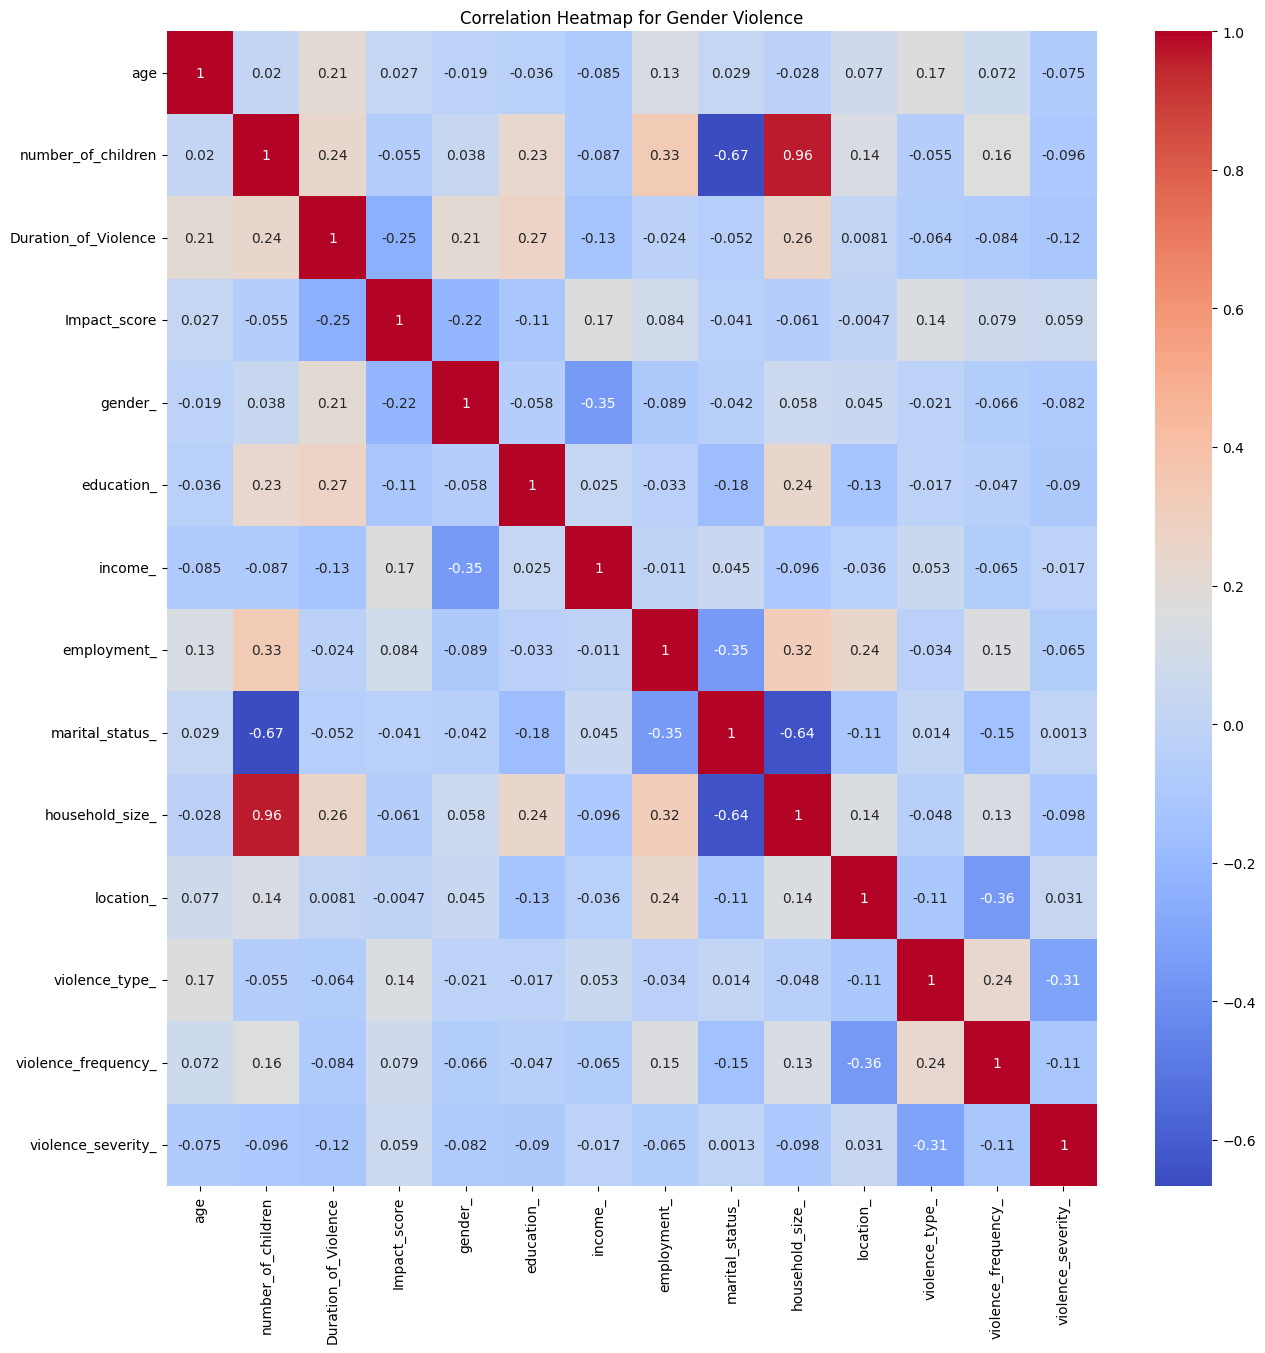

In [140]:
import matplotlib.pyplot as plt
#calcualting the correlation for the data
corr = df.corr()

#configuring map size
plt.figure(figsize=(15,15))
#plotting a heatmap to visualize correlation coefficient and relationship
sb.heatmap(corr, cmap='coolwarm',annot=True)
plt.title('Correlation Heatmap for Gender Violence')
plt.show()

## Doing a feature selection
Number of children is correlating highly with household size. I'll remove number_of_children because the general size of a household typically includes the number of children a person has

In [153]:
df.drop('number_of_children', axis=1, inplace=True)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   242 non-null    float64
 1   Duration_of_Violence  242 non-null    float64
 2   Impact_score          242 non-null    float64
 3   gender_               242 non-null    int32  
 4   education_            242 non-null    int32  
 5   income_               242 non-null    int32  
 6   employment_           242 non-null    int32  
 7   marital_status_       242 non-null    int32  
 8   household_size_       242 non-null    int32  
 9   location_             242 non-null    int32  
 10  violence_type_        242 non-null    int32  
 11  violence_frequency_   242 non-null    int32  
 12  violence_severity_    242 non-null    int32  
dtypes: float64(3), int32(10)
memory usage: 15.3 KB


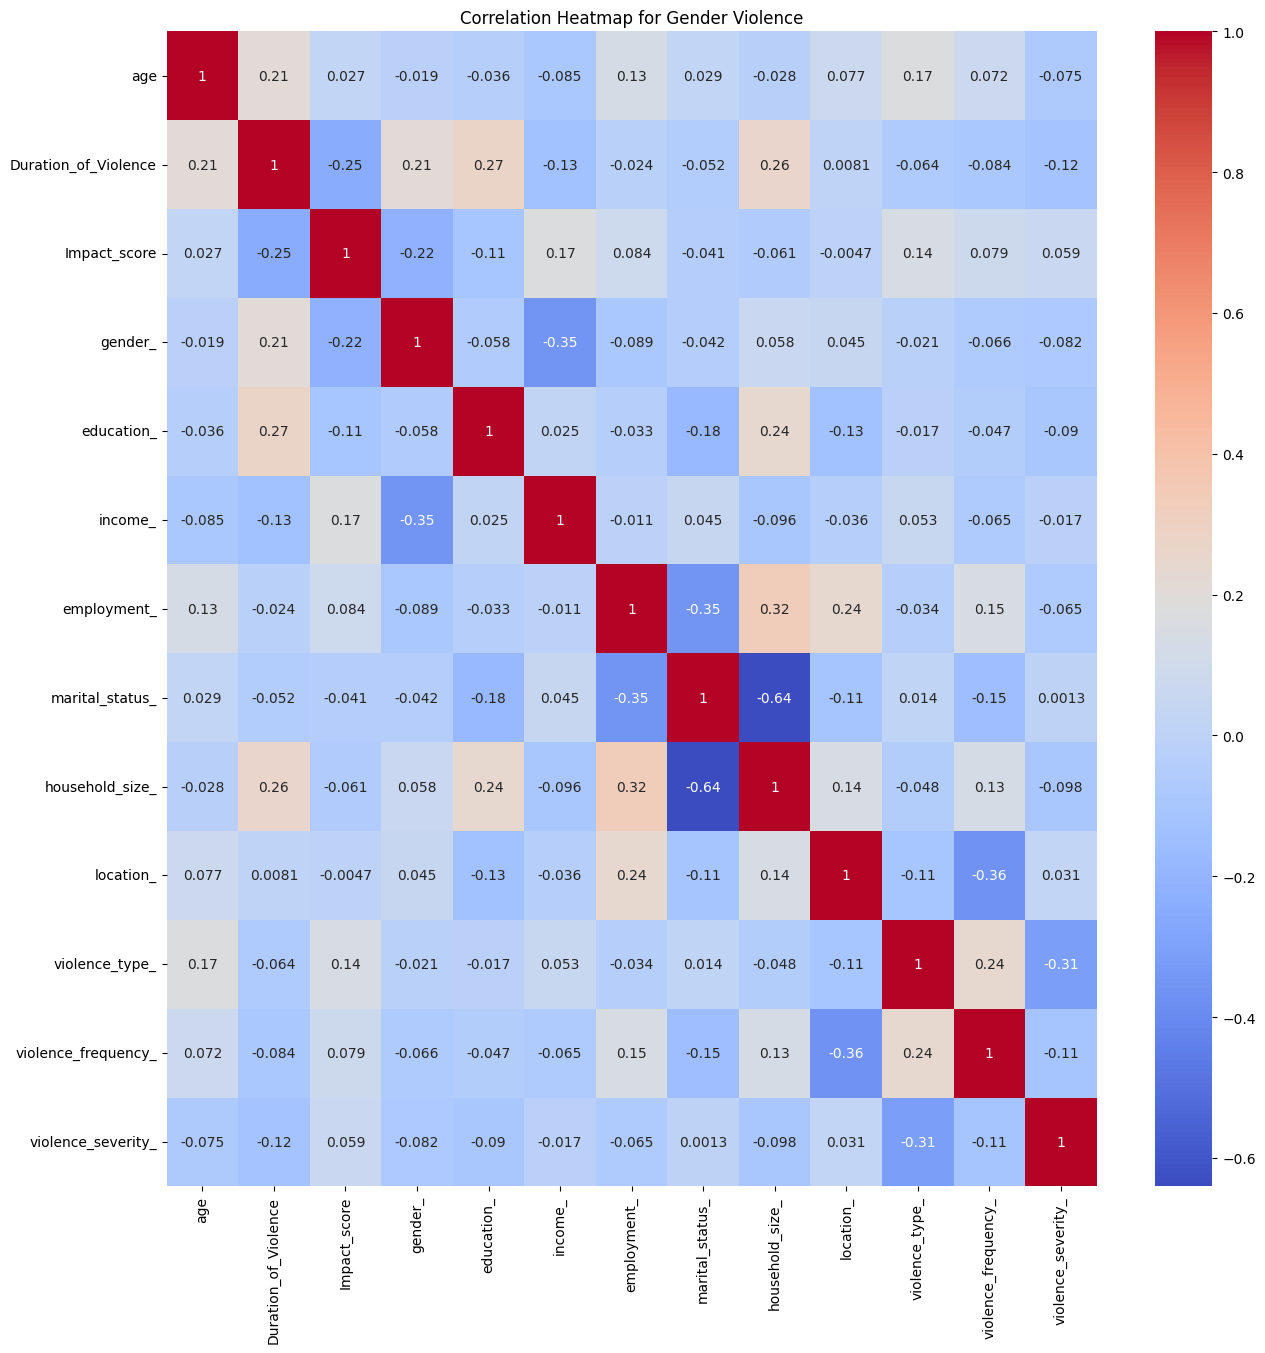

In [157]:
import matplotlib.pyplot as plt
#calcualting the correlation for the data
corr = df.corr()

#configuring map size
plt.figure(figsize=(15,15))
#plotting a heatmap to visualize correlation coefficient and relationship
sb.heatmap(corr, cmap='coolwarm',annot=True)
plt.title('Correlation Heatmap for Gender Violence')
plt.show()

### To print a new copy of the dataset

In [165]:
df.to_csv("GenderViolenceCleaned.csv", index = False)

## Data Cleaning/Preprocessing Completed!!!